In [5]:
import json
import pandas as pd

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Display the DataFrames
print("DataFrame for company_X_comments:")
print(company_X_comments.head())
print()

print("DataFrame for company_Y_comments:")
print(company_Y_comments.head())
print()

print("DataFrame for company_Z_comments:")
print(company_Z_comments.head())
print()

DataFrame for company_X_comments:
         date                                               text
0  2020-08-04  \n  Yea..pre-ordered on 28 July, got it on 4 A...
1  2020-08-03  \n  Got it delivered yesterday , used for abou...
2  2020-08-04                              \n  An amazing phone!
3  2020-08-02                                    \n  Brilliant..
4  2020-08-04  \n  I was skeptical about changing from One pl...

DataFrame for company_Y_comments:
         date                                               text
0  2020-03-21  \n  Beauty and the beast combination with snap...
1  2020-03-22  \n  Super camera, battery, sound amazing  very...
2  2020-03-21  \n  Excellent. Nice phone. Thanks to Amazon fi...
3  2020-03-21                                         \n  Pros -
4  2020-03-21  \n  Superb phone. Awesome camera, battery, pro...

DataFrame for company_Z_comments:
         date                                               text
0  2019-11-06  \n  Febulas performance Redmi Note 8

NLTK+TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\vamshi\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\vamshi\AppData\Local\Temp\ipykernel_22444\2361957225.py", line 166, in show_bar_graph
    sentiments = [analyze_sentiment_word2vec(comment["text"], word2vec_model) for comment in year_comments]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'analyze_sentiment_word2vec' is not defined. Did you mean: 'analyze_sentiment_textblob'?
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\vamshi\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\v

Accuracy: 0.7402224614280588
F1 Score: 0.6607802768542755


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\vamshi\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\vamshi\AppData\Local\Temp\ipykernel_22444\2361957225.py", line 166, in show_bar_graph
    sentiments = [analyze_sentiment_word2vec(comment["text"], word2vec_model) for comment in year_comments]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'analyze_sentiment_word2vec' is not defined. Did you mean: 'analyze_sentiment_textblob'?


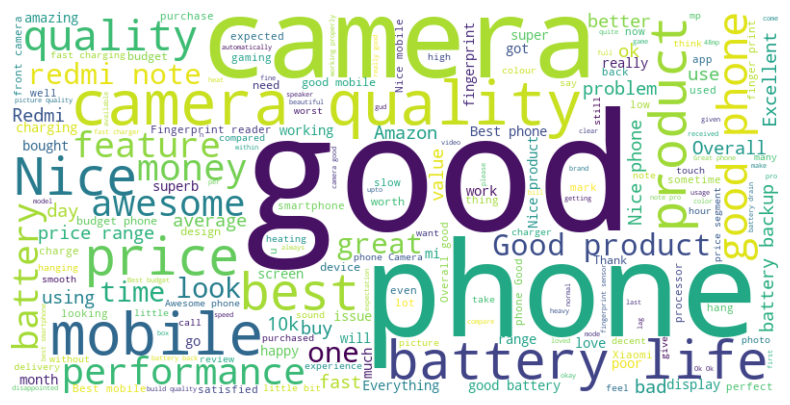

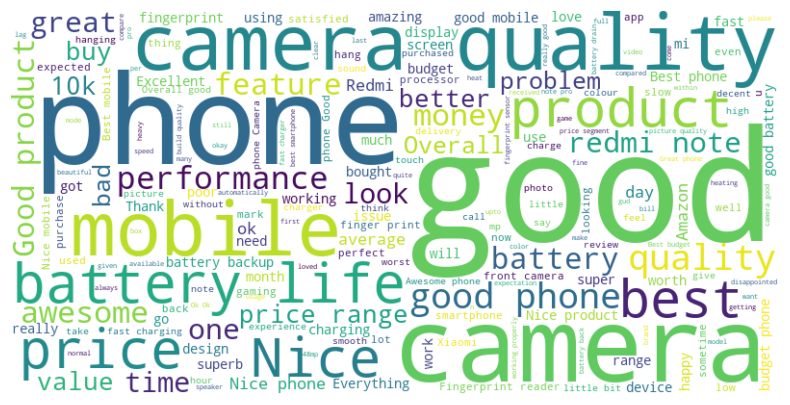

In [13]:

import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import pandas as pd
#import networkx as nx
import json
from textblob import TextBlob  # Import TextBlob for sentiment analysis

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(comment):
    analysis = TextBlob(comment)
    # Define threshold for classifying sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Function to extract year from date string
def extract_year(date_str):
    try:
        datetime_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime_obj.year
    except ValueError:
        print("Error: Invalid date string:", date_str)
        return None

# Function to get the most frequent words
def get_most_frequent_words(comments, n=10):
    word_counts = Counter(comments)
    words_freq = word_counts.most_common(n)
    return words_freq

# Function to generate word cloud
def generate_word_cloud(comments):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to construct and display network graph
def construct_and_display_network_graph():
    G = nx.Graph()
    for comment in company_Z_comments:
        G.add_node(comment["date"])
    plt.figure(figsize=(10, 5))
    nx.draw(G, with_labels=True)
    plt.title('Network Graph')
    plt.show()

# Function to split the data into train and test sets, train a model, and evaluate its performance
def train_and_evaluate_model():
    # Extract features (text) and labels (sentiment)
    comments_text = [comment["text"] for comment in company_Z_comments]
    sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in company_Z_comments]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(comments_text, sentiments, test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train a Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_test_vec)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the accuracy and F1-score
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

# GUI
class SentimentDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Sentiment Analysis Dashboard")

        # Dropdown to select year for bar graph
        self.year_var = tk.StringVar()
        self.year_dropdown = ttk.Combobox(self, textvariable=self.year_var,
                                          values=sorted(set(comment["date"][:4] for comment in company_Z_comments)))
        self.year_dropdown.pack()

        # Frame for displaying plots
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Button to display bar graph
        self.show_bar_graph_button = ttk.Button(self, text="Show Sentiment Bar Graph", command=self.show_bar_graph)
        self.show_bar_graph_button.pack()

        # Button to generate word cloud
        self.generate_word_cloud_button = ttk.Button(self, text="Generate Word Cloud", command=self.generate_word_cloud)
        self.generate_word_cloud_button.pack()  

        # Button to construct and display network graph
        self.network_graph_button = ttk.Button(self, text="Network Graph", command=self.construct_and_display_network_graph)
        self.network_graph_button.pack()

        # Button to train and evaluate the model
        self.train_model_button = ttk.Button(self, text="Train and Evaluate Model", command=train_and_evaluate_model)
        self.train_model_button.pack()

    def show_bar_graph(self):
        # Calculate sentiment percentages by year
        sentiment_percentages_by_year = {}
        for year in sorted(set(comment["date"][:4] for comment in company_Z_comments)):
            year_comments = [comment for comment in company_Z_comments if comment["date"].startswith(year)]
            sentiments = [analyze_sentiment_word2vec(comment["text"], word2vec_model) for comment in year_comments]
            sentiment_counts = Counter(sentiments)
            total_comments = len(sentiments)
            sentiment_percentages = {sentiment: (count / total_comments) * 100 for sentiment, count in sentiment_counts.items()}
            sentiment_percentages_by_year[year] = sentiment_percentages

        # Extract data for plotting
        years = sorted(sentiment_percentages_by_year.keys())
        positive_percentages = [sentiment_percentages_by_year[year].get('positive', 0) for year in years]
        negative_percentages = [sentiment_percentages_by_year[year].get('negative', 0) for year in years]
        neutral_percentages = [sentiment_percentages_by_year[year].get('neutral', 0) for year in years]

        # Plotting
        fig, ax = plt.subplots()
        bar_width = 0.2  # Width of the bars
        index = np.arange(len(years))

        ax.bar(index, positive_percentages, bar_width, label='Positive', color='green')
        ax.bar(index + bar_width, negative_percentages, bar_width, label='Negative', color='red')
        ax.bar(index + 2 * bar_width, neutral_percentages, bar_width, label='Neutral', color='gray')

        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage')
        ax.set_title('Sentiment Analysis by Year')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Clear previous plot frame and create a new one for the bar graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

    def generate_word_cloud(self):
        all_comments = [comment["text"] for comment in company_Z_comments]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_comments))

        # Clear previous plot frame and create a new one for word cloud
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the word cloud plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def construct_and_display_network_graph(self):
        G = nx.Graph()
        for comment in company_Z_comments:
            G.add_node(comment["date"])

        # Clear previous plot frame and create a new one for network graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the network graph plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        nx.draw(G, with_labels=True)
        plt.title('Network Graph')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Run the application
if __name__ == "__main__":
    app = SentimentDashboard()
    app.mainloop()


Vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vamshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


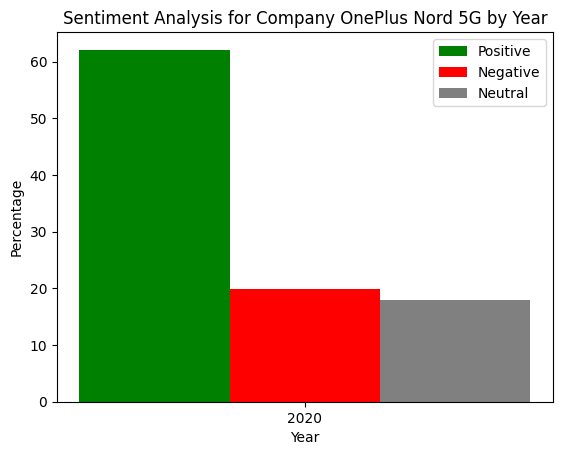

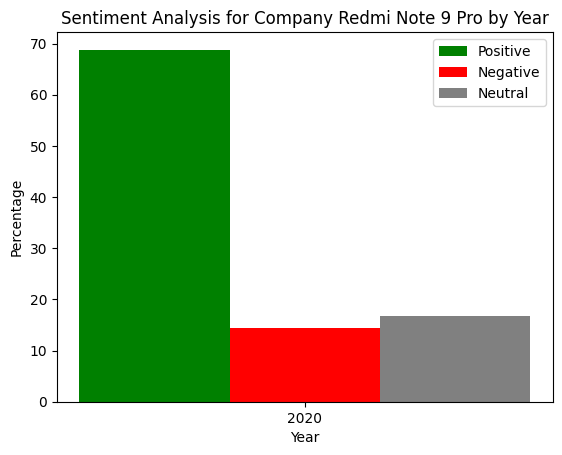

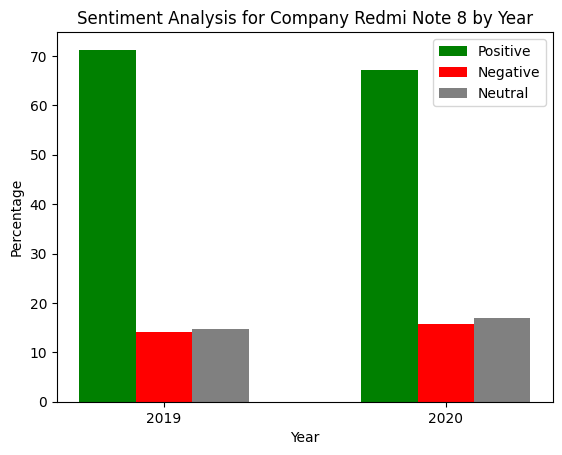

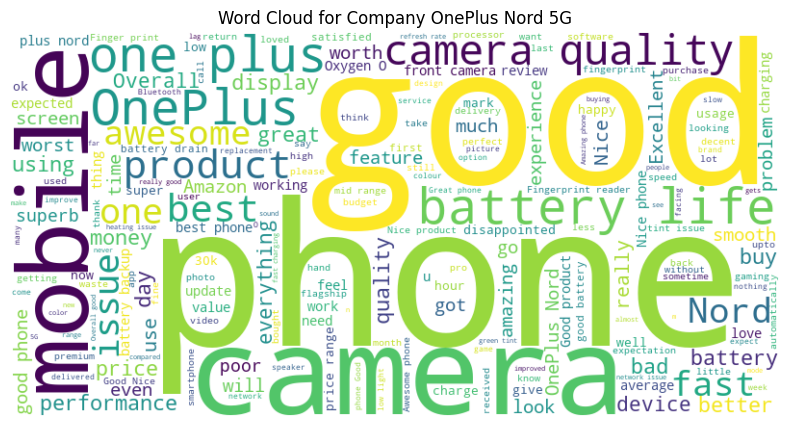

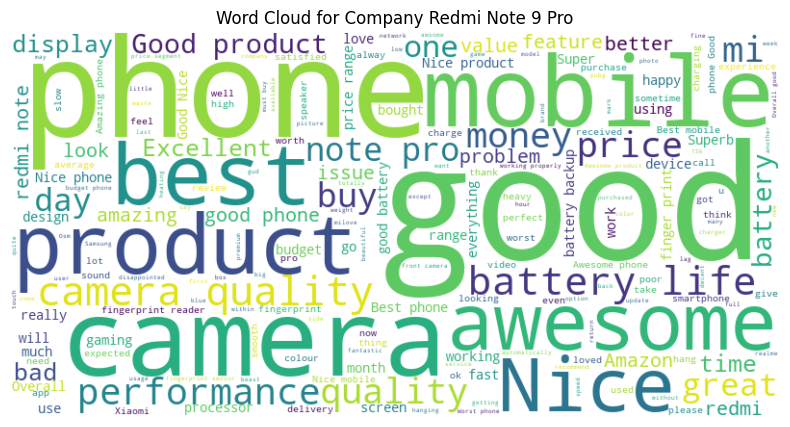

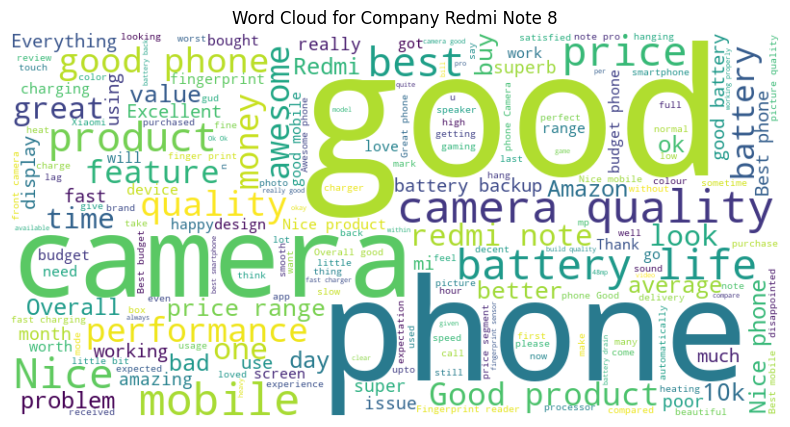

In [14]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import json
from wordcloud import WordCloud  # Import WordCloud

# Download NLTK resources
nltk.download('vader_lexicon')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Convert DataFrame to list of dictionaries for each company
company_X_comments = [
    {"date": date, "text": text} for date, text in zip(company_X_comments['date'], company_X_comments['text'])
]
company_Y_comments = [
    {"date": date, "text": text} for date, text in zip(company_Y_comments['date'], company_Y_comments['text'])
]
company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]


# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(comment):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(comment)
    return scores['compound']

# Function to extract year from date string
def extract_year(date_str):
    try:
        datetime_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime_obj.year
    except ValueError:
        print("Error: Invalid date string:", date_str)
        return None

# Function to classify sentiment based on VADER score
def classify_sentiment(score):
    POSITIVE_THRESHOLD = 0.05
    NEGATIVE_THRESHOLD = -0.05
    if score >= POSITIVE_THRESHOLD:
        return 'positive'
    elif score <= NEGATIVE_THRESHOLD:
        return 'negative'
    else:
        return 'neutral'

# Function to calculate sentiment percentages
def calculate_sentiment_percentages(comments):
    # Classify comments by year
    comments_by_year = {}
    for comment in comments:
        year = extract_year(comment["date"])
        if year is not None:  # Exclude None values
            if year not in comments_by_year:
                comments_by_year[year] = []
            comments_by_year[year].append(comment["text"])

    # Now we apply the sentiment analysis to each year's comments
    sentiments_by_year = {}
    for year, comments_list in comments_by_year.items():
        sentiments = [analyze_sentiment_vader(comment) for comment in comments_list]
        sentiments_by_year[year] = sentiments

    # Calculate sentiment percentages
    sentiment_percentages_by_year = {}
    for year, sentiments in sentiments_by_year.items():
        classified_sentiments = [classify_sentiment(score) for score in sentiments]
        sentiment_counts = Counter(classified_sentiments)
        total = len(sentiments)
        percentages = {sentiment: (count/total) * 100 for sentiment, count in sentiment_counts.items()}
        sentiment_percentages_by_year[year] = percentages

    return sentiment_percentages_by_year

# Function to plot sentiment analysis
def plot_sentiment_analysis(sentiment_percentages, company_name):
    years = sorted(sentiment_percentages.keys())
    categories = ['positive', 'negative', 'neutral']

    fig, ax = plt.subplots()
    bar_width = 0.2  # Width of the bars
    index = np.arange(len(years))

    for i, category in enumerate(categories):
        data = [sentiment_percentages[year].get(category, 0) for year in years]
        ax.bar(index + i * bar_width, data, bar_width, label=category.capitalize(),
               color=['green', 'red', 'gray'][i])

    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Analysis for {company_name} by Year')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(years)
    ax.legend()

    plt.show()

# Function to generate word cloud
def generate_word_cloud(comments, company_name):
    # Concatenate all comments into a single string
    all_comments = " ".join(comment["text"] for comment in comments)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company_name}')
    plt.axis('off')
    plt.show()

# Calculate sentiment percentages for each company
sentiment_percentages_X = calculate_sentiment_percentages(company_X_comments)
sentiment_percentages_Y = calculate_sentiment_percentages(company_Y_comments)
sentiment_percentages_Z = calculate_sentiment_percentages(company_Z_comments)

# Plot sentiment analysis for each company
plot_sentiment_analysis(sentiment_percentages_X, "Company OnePlus Nord 5G")
plot_sentiment_analysis(sentiment_percentages_Y, "Company Redmi Note 9 Pro")
plot_sentiment_analysis(sentiment_percentages_Z, "Company Redmi Note 8")

# Generate word clouds for each company
generate_word_cloud(company_X_comments, "Company OnePlus Nord 5G")
generate_word_cloud(company_Y_comments, "Company Redmi Note 9 Pro")
generate_word_cloud(company_Z_comments, "Company Redmi Note 8")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Function to calculate accuracy and F1 score
def calculate_accuracy_and_f1_score(sentiment_percentages, comments):
    true_labels = [classify_sentiment(analyze_sentiment_vader(comment["text"])) for comment in comments]
    predicted_labels = [max(sentiment_percentages[extract_year(comment["date"])], key=sentiment_percentages[extract_year(comment["date"])].get) for comment in comments]
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return accuracy, f1

# Calculate sentiment percentages for each company
sentiment_percentages_X = calculate_sentiment_percentages(company_X_comments)
sentiment_percentages_Y = calculate_sentiment_percentages(company_Y_comments)
sentiment_percentages_Z = calculate_sentiment_percentages(company_Z_comments)

# Calculate accuracy and F1 score for each company
accuracy_X, f1_X = calculate_accuracy_and_f1_score(sentiment_percentages_X, company_X_comments)
accuracy_Y, f1_Y = calculate_accuracy_and_f1_score(sentiment_percentages_Y, company_Y_comments)
accuracy_Z, f1_Z = calculate_accuracy_and_f1_score(sentiment_percentages_Z, company_Z_comments)

# Print accuracy and F1 score for each company
print("Company OnePlus Nord 5G:")
print("Accuracy:", accuracy_X)
print("F1 Score:", f1_X)
print("\n")

print("Company Redmi Note 9 Pro:")
print("Accuracy:", accuracy_Y)
print("F1 Score:", f1_Y)
print("\n")

print("Company Redmi Note 8:")
print("Accuracy:", accuracy_Z)
print("F1 Score:", f1_Z)

Company OnePlus Nord 5G:
Accuracy: 0.6210793114373218
F1 Score: 0.4759045512134058


Company Redmi Note 9 Pro:
Accuracy: 0.6878901373283396
F1 Score: 0.5606915172602295


Company Redmi Note 8:
Accuracy: 0.6814984928950768
F1 Score: 0.5524122653462783


word2vec

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yosri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8001435235019735
F1 Score: 0.7956448723894156


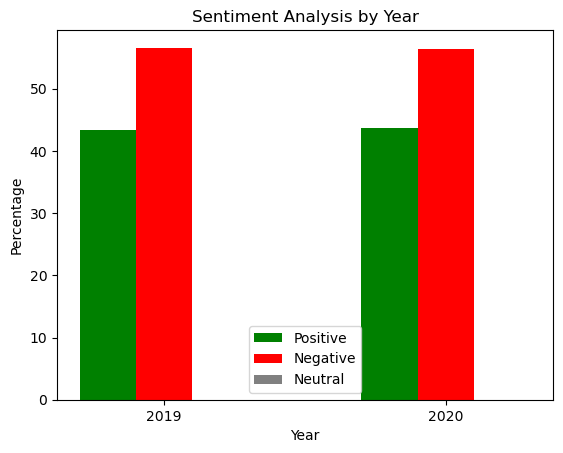

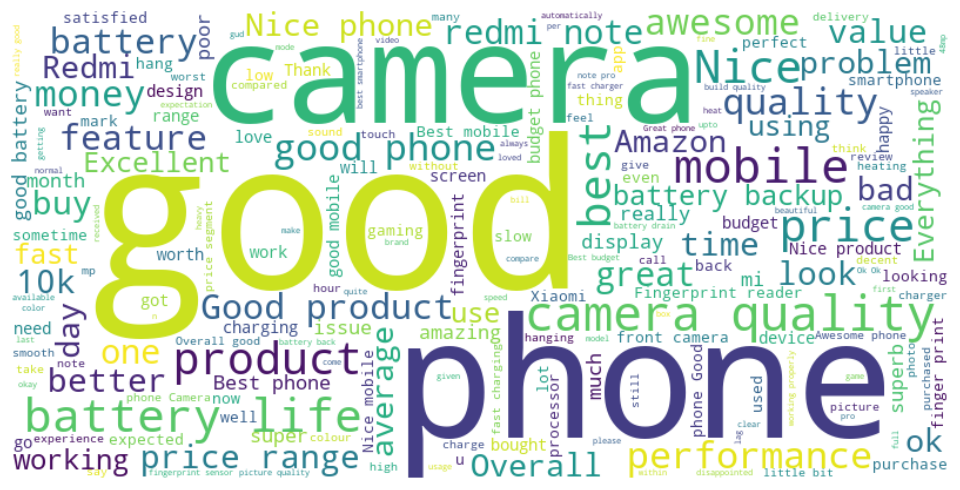

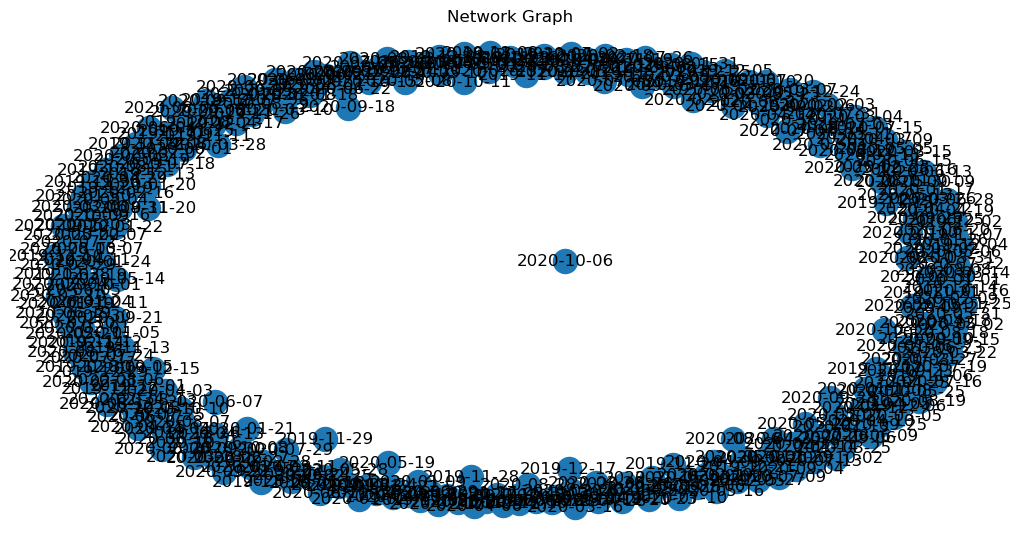

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import pandas as pd
import networkx as nx
import json
from gensim.models import Word2Vec  # Import Word2Vec for word embeddings

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to train Word2Vec model
def train_word2vec_model(comments):
    tokenized_comments = [comment.split() for comment in comments]
    model = Word2Vec(sentences=tokenized_comments, vector_size=100, window=5, min_count=1, workers=4)
    return model

# Function to perform sentiment analysis using Word2Vec
def analyze_sentiment_word2vec(comment, model):
    comment_vector = np.mean([model.wv[word] for word in comment.split() if word in model.wv], axis=0)
    # Perform sentiment analysis based on the comment vector
    # For simplicity, let's assume sentiment is positive if the average vector value is positive
    if np.mean(comment_vector) > 0:
        return 'positive'
    elif np.mean(comment_vector) < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to get the most frequent words
def get_most_frequent_words(comments, n=10):
    word_counts = Counter(comments)
    words_freq = word_counts.most_common(n)
    return words_freq

# Function to generate word cloud
def generate_word_cloud(comments):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to construct and display network graph
def construct_and_display_network_graph():
    G = nx.Graph()
    for comment in company_Z_comments:
        G.add_node(comment["date"])
    plt.figure(figsize=(10, 5))
    nx.draw(G, with_labels=True)
    plt.title('Network Graph')
    plt.show()

# Function to split the data into train and test sets, train a model, and evaluate its performance
def train_and_evaluate_model():
    # Extract features (text) and labels (sentiment)
    comments_text = [comment["text"] for comment in company_Z_comments]
    sentiments = [analyze_sentiment_word2vec(comment["text"], word2vec_model) for comment in company_Z_comments]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(comments_text, sentiments, test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train a Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_test_vec)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the accuracy and F1-score
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

# GUI
class SentimentDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Sentiment Analysis Dashboard")

        # Dropdown to select year for bar graph
        self.year_var = tk.StringVar()
        self.year_dropdown = ttk.Combobox(self, textvariable=self.year_var,
                                          values=sorted(set(comment["date"][:4] for comment in company_Z_comments)))
        self.year_dropdown.pack()

        # Frame for displaying plots
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Button to display bar graph
        self.show_bar_graph_button = ttk.Button(self, text="Show Sentiment Bar Graph", command=self.show_bar_graph)
        self.show_bar_graph_button.pack()

        # Button to generate word cloud
        self.generate_word_cloud_button = ttk.Button(self, text="Generate Word Cloud", command=self.generate_word_cloud)
        self.generate_word_cloud_button.pack()  

        # Button to construct and display network graph
        self.network_graph_button = ttk.Button(self, text="Network Graph", command=self.construct_and_display_network_graph)
        self.network_graph_button.pack()

        # Button to train and evaluate the model
        self.train_model_button = ttk.Button(self, text="Train and Evaluate Model", command=train_and_evaluate_model)
        self.train_model_button.pack()

    def show_bar_graph(self):
        # Calculate sentiment percentages by year
        sentiment_percentages_by_year = {}
        for year in sorted(set(comment["date"][:4] for comment in company_Z_comments)):
            year_comments = [comment for comment in company_Z_comments if comment["date"].startswith(year)]
            sentiments = [analyze_sentiment_word2vec(comment["text"], word2vec_model) for comment in year_comments]
            sentiment_counts = Counter(sentiments)
            total_comments = len(sentiments)
            sentiment_percentages = {sentiment: (count / total_comments) * 100 for sentiment, count in sentiment_counts.items()}
            sentiment_percentages_by_year[year] = sentiment_percentages

        # Extract data for plotting
        years = sorted(sentiment_percentages_by_year.keys())
        positive_percentages = [sentiment_percentages_by_year[year].get('positive', 0) for year in years]
        negative_percentages = [sentiment_percentages_by_year[year].get('negative', 0) for year in years]
        neutral_percentages = [sentiment_percentages_by_year[year].get('neutral', 0) for year in years]

        # Plotting
        fig, ax = plt.subplots()
        bar_width = 0.2  # Width of the bars
        index = np.arange(len(years))

        ax.bar(index, positive_percentages, bar_width, label='Positive', color='green')
        ax.bar(index + bar_width, negative_percentages, bar_width, label='Negative', color='red')
        ax.bar(index + 2 * bar_width, neutral_percentages, bar_width, label='Neutral', color='gray')

        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage')
        ax.set_title('Sentiment Analysis by Year')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Clear previous plot frame and create a new one for the bar graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the bar graph plot into the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def generate_word_cloud(self):
        # Extract all comments
        all_comments = [comment["text"] for comment in company_Z_comments]
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_comments))
        
        # Clear previous plot frame and create a new one for the word cloud
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the word cloud plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def construct_and_display_network_graph(self):
        G = nx.Graph()
        for comment in company_Z_comments:
            G.add_node(comment["date"])

        # Clear previous plot frame and create a new one for network graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the network graph plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        nx.draw(G, with_labels=True)
        plt.title('Network Graph')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Train Word2Vec model
word2vec_model = train_word2vec_model([comment["text"] for comment in company_Z_comments])

# Run the application
if __name__ == "__main__":
    app = SentimentDashboard()
    app.mainloop()


LSTM

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import pandas as pd
import networkx as nx
import json
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf  # Import TensorFlow module

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(comment):
    analysis = TextBlob(comment)
    # Define threshold for classifying sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Function to train LSTM model
def train_lstm_model(comments, sentiments):
    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(comments)
    vocab_size = len(tokenizer.word_index) + 1
    sequences = tokenizer.texts_to_sequences(comments)

    # Pad sequences to ensure uniform length
    max_len = max([len(seq) for seq in sequences])
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    # Convert sentiments to one-hot encoding
    label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
    labels = [label_dict[sentiment] for sentiment in sentiments]
    labels = to_categorical(labels)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    embedding_dim = 100
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Use LSTM instead of Bidirectional LSTM
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate as needed
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

    return model, tokenizer, max_len

# Function to analyze sentiment using LSTM model
def analyze_sentiment_lstm(model, tokenizer, max_len, comment):
    # Tokenize and pad the comment
    sequence = tokenizer.texts_to_sequences([comment])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict sentiment
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction)

    label_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return label_dict[predicted_class]

# Function to extract year from date string
def extract_year(date_str):
    try:
        datetime_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime_obj.year
    except ValueError:
        print("Error: Invalid date string:", date_str)
        return None

# Function to get the most frequent words
def get_most_frequent_words(comments, n=10):
    word_counts = Counter(comments)
    words_freq = word_counts.most_common(n)
    return words_freq

# Function to generate word cloud
def generate_word_cloud(comments):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to construct and display network graph
def construct_and_display_network_graph():
    G = nx.Graph()
    for comment in company_Z_comments:
        G.add_node(comment["date"])
    plt.figure(figsize=(10, 5))
    nx.draw(G, with_labels=True)
    plt.title('Network Graph')
    plt.show()

# Function to split the data into train and test sets, train a model, and evaluate its performance
def train_and_evaluate_model():
    # Extract features (text) and labels (sentiment)
    comments_text = [comment["text"] for comment in company_Z_comments]
    sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in company_Z_comments]

    # Train and evaluate LSTM model
    lstm_model, tokenizer, max_len = train_lstm_model(comments_text, sentiments)

    # Test LSTM model
    test_comments = ["This phone is amazing!", "The phone arrived broken.", "I have mixed feelings about this product."]
    for comment in test_comments:
        sentiment = analyze_sentiment_lstm(lstm_model, tokenizer, max_len, comment)
        print(f"LSTM Prediction for '{comment}': {sentiment}")

# GUI
class SentimentDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Sentiment Analysis Dashboard")

        # Dropdown to select year for bar graph
        self.year_var = tk.StringVar()
        self.year_dropdown = ttk.Combobox(self, textvariable=self.year_var,
                                          values=sorted(set(comment["date"][:4] for comment in company_Z_comments)))
        self.year_dropdown.pack()

        # Frame for displaying plots
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Button to display bar graph
        self.show_bar_graph_button = ttk.Button(self, text="Show Sentiment Bar Graph", command=self.show_bar_graph)
        self.show_bar_graph_button.pack()

        # Button to generate word cloud
        self.generate_word_cloud_button = ttk.Button(self, text="Generate Word Cloud", command=self.generate_word_cloud)
        self.generate_word_cloud_button.pack()  

        # Button to construct and display network graph
        self.network_graph_button = ttk.Button(self, text="Network Graph", command=self.construct_and_display_network_graph)
        self.network_graph_button.pack()

        # Button to train and evaluate the model
        self.train_model_button = ttk.Button(self, text="Train and Evaluate Model", command=train_and_evaluate_model)
        self.train_model_button.pack()

    def show_bar_graph(self):
        # Calculate sentiment percentages by year
        sentiment_percentages_by_year = {}
        for year in sorted(set(comment["date"][:4] for comment in company_Z_comments)):
            year_comments = [comment for comment in company_Z_comments if comment["date"].startswith(year)]
            sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in year_comments]
            sentiment_counts = Counter(sentiments)
            total_comments = len(sentiments)
            sentiment_percentages = {sentiment: (count / total_comments) * 100 for sentiment, count in sentiment_counts.items()}
            sentiment_percentages_by_year[year] = sentiment_percentages

        # Extract data for plotting
        years = sorted(sentiment_percentages_by_year.keys())
        positive_percentages = [sentiment_percentages_by_year[year].get('positive', 0) for year in years]
        negative_percentages = [sentiment_percentages_by_year[year].get('negative', 0) for year in years]
        neutral_percentages = [sentiment_percentages_by_year[year].get('neutral', 0) for year in years]

        # Plotting
        fig, ax = plt.subplots()
        bar_width = 0.2  # Width of the bars
        index = np.arange(len(years))

        ax.bar(index, positive_percentages, bar_width, label='Positive', color='green')
        ax.bar(index + bar_width, negative_percentages, bar_width, label='Negative', color='red')
        ax.bar(index + 2 * bar_width, neutral_percentages, bar_width, label='Neutral', color='gray')

        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage')
        ax.set_title('Sentiment Analysis by Year')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Clear previous plot frame and create a new one for the bar graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the bar graph plot into the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def generate_word_cloud(self):
        # Extract all comments
        all_comments = [comment["text"] for comment in company_Z_comments]
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_comments))
        
        # Clear previous plot frame and create a new one for the word cloud
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the word cloud plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def construct_and_display_network_graph(self):
        G = nx.Graph()
        for comment in company_Z_comments:
            G.add_node(comment["date"])

        # Clear previous plot frame and create a new one for network graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the network graph plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        nx.draw(G, with_labels=True)
        plt.title('Network Graph')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Run the application
if __name__ == "__main__":
    app = SentimentDashboard()
    app.mainloop()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vk768\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Epoch 1/12


175/175 [==============================] - 140s 777ms/step - loss: 0.8095 - accuracy: 0.6965 - val_loss: 0.7753 - val_accuracy: 0.7126
Epoch 2/12
175/175 [==============================] - 147s 840ms/step - loss: 0.7992 - accuracy: 0.6994 - val_loss: 0.7756 - val_accuracy: 0.7126
Epoch 3/12
175/175 [==============================] - 390s 2s/step - loss: 0.7981 - accuracy: 0.6994 - val_loss: 0.7742 - val_accuracy: 0.7126
Epoch 4/12
175/175 [==============================] - 360s 2s/step - loss: 0.7992 - accuracy: 0.6994 - val_loss: 0.7743 - val_accuracy: 0.7126
Epoch 5/12
175/175 [==============================] - 364s 2s/step - loss: 0.7974 - accuracy: 0.6994 - val_loss: 0.7748 - val_accuracy: 0.7126
Epoch 6/12
1/1 [==============================] - 2s 2s/step
LSTM Prediction for 'This phone is amazing!': positive
1/1 [==============================] - 0s 170ms/step
LSTM Prediction for 'The phone arrived broken.': positive
1/1 [==============================] - 0s 240ms/s

BLSTM

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
import pandas as pd
import networkx as nx
import json
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf  # Import TensorFlow module

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(comment):
    analysis = TextBlob(comment)
    # Define threshold for classifying sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Function to train BLSTM model
def train_blstm_model(comments, sentiments):
    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(comments)
    vocab_size = len(tokenizer.word_index) + 1
    sequences = tokenizer.texts_to_sequences(comments)

    # Pad sequences to ensure uniform length
    max_len = max([len(seq) for seq in sequences])
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

    # Convert sentiments to one-hot encoding
    label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
    labels = [label_dict[sentiment] for sentiment in sentiments]
    labels = to_categorical(labels)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

    # Build BLSTM model
    embedding_dim = 100
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate as needed
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

    return model, tokenizer, max_len

# Function to analyze sentiment using BLSTM model
def analyze_sentiment_blstm(model, tokenizer, max_len, comment):
    # Tokenize and pad the comment
    sequence = tokenizer.texts_to_sequences([comment])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict sentiment
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction)

    label_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return label_dict[predicted_class]

# Function to extract year from date string
def extract_year(date_str):
    try:
        datetime_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return datetime_obj.year
    except ValueError:
        print("Error: Invalid date string:", date_str)
        return None

# Function to get the most frequent words
def get_most_frequent_words(comments, n=10):
    word_counts = Counter(comments)
    words_freq = word_counts.most_common(n)
    return words_freq

# Function to generate word cloud
def generate_word_cloud(comments):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Function to construct and display network graph
def construct_and_display_network_graph():
    G = nx.Graph()
    for comment in company_Z_comments:
        G.add_node(comment["date"])
    plt.figure(figsize=(10, 5))
    nx.draw(G, with_labels=True)
    plt.title('Network Graph')
    plt.show()

# Function to split the data into train and test sets, train a model, and evaluate its performance
def train_and_evaluate_model():
    # Extract features (text) and labels (sentiment)
    comments_text = [comment["text"] for comment in company_Z_comments]
    sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in company_Z_comments]

    # Train and evaluate BLSTM model
    blstm_model, tokenizer, max_len = train_blstm_model(comments_text, sentiments)

    # Test BLSTM model
    test_comments = ["This phone is amazing!", "The phone arrived broken.", "I have mixed feelings about this product."]
    for comment in test_comments:
        sentiment = analyze_sentiment_blstm(blstm_model, tokenizer, max_len, comment)
        print(f"BLSTM Prediction for '{comment}': {sentiment}")

# GUI
class SentimentDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Sentiment Analysis Dashboard")

        # Dropdown to select year for bar graph
        self.year_var = tk.StringVar()
        self.year_dropdown = ttk.Combobox(self, textvariable=self.year_var,
                                          values=sorted(set(comment["date"][:4] for comment in company_Z_comments)))
        self.year_dropdown.pack()

        # Frame for displaying plots
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Button to display bar graph
        self.show_bar_graph_button = ttk.Button(self, text="Show Sentiment Bar Graph", command=self.show_bar_graph)
        self.show_bar_graph_button.pack()

        # Button to generate word cloud
        self.generate_word_cloud_button = ttk.Button(self, text="Generate Word Cloud", command=self.generate_word_cloud)
        self.generate_word_cloud_button.pack()  

        # Button to construct and display network graph
        self.network_graph_button = ttk.Button(self, text="Network Graph", command=self.construct_and_display_network_graph)
        self.network_graph_button.pack()

        # Button to train and evaluate the model
        self.train_model_button = ttk.Button(self, text="Train and Evaluate Model", command=train_and_evaluate_model)
        self.train_model_button.pack()

    def show_bar_graph(self):
        # Calculate sentiment percentages by year
        sentiment_percentages_by_year = {}
        for year in sorted(set(comment["date"][:4] for comment in company_Z_comments)):
            year_comments = [comment for comment in company_Z_comments if comment["date"].startswith(year)]
            sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in year_comments]
            sentiment_counts = Counter(sentiments)
            total_comments = len(sentiments)
            sentiment_percentages = {sentiment: (count / total_comments) * 100 for sentiment, count in sentiment_counts.items()}
            sentiment_percentages_by_year[year] = sentiment_percentages

        # Extract data for plotting
        years = sorted(sentiment_percentages_by_year.keys())
        positive_percentages = [sentiment_percentages_by_year[year].get('positive', 0) for year in years]
        negative_percentages = [sentiment_percentages_by_year[year].get('negative', 0) for year in years]
        neutral_percentages = [sentiment_percentages_by_year[year].get('neutral', 0) for year in years]

        # Plotting
        fig, ax = plt.subplots()
        bar_width = 0.2  # Width of the bars
        index = np.arange(len(years))

        ax.bar(index, positive_percentages, bar_width, label='Positive', color='green')
        ax.bar(index + bar_width, negative_percentages, bar_width, label='Negative', color='red')
        ax.bar(index + 2 * bar_width, neutral_percentages, bar_width, label='Neutral', color='gray')

        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage')
        ax.set_title('Sentiment Analysis by Year')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Clear previous plot frame and create a new one for the bar graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the bar graph plot into the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def generate_word_cloud(self):
        # Extract all comments
        all_comments = [comment["text"] for comment in company_Z_comments]
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_comments))
        
        # Clear previous plot frame and create a new one for the word cloud
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the word cloud plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def construct_and_display_network_graph(self):
        G = nx.Graph()
        for comment in company_Z_comments:
            G.add_node(comment["date"])

        # Clear previous plot frame and create a new one for network graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the network graph plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        nx.draw(G, with_labels=True)
        plt.title('Network Graph')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Run the application
if __name__ == "__main__":
    app = SentimentDashboard()
    app.mainloop()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vk768\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Epoch 1/12


175/175 [==============================] - 488s 3s/step - loss: 0.6148 - accuracy: 0.7537 - val_loss: 0.3932 - val_accuracy: 0.8382
Epoch 2/12
175/175 [==============================] - 511s 3s/step - loss: 0.3154 - accuracy: 0.8896 - val_loss: 0.2803 - val_accuracy: 0.9099
Epoch 3/12
175/175 [==============================] - 522s 3s/step - loss: 0.1971 - accuracy: 0.9333 - val_loss: 0.2384 - val_accuracy: 0.9178
Epoch 4/12
175/175 [==============================] - 521s 3s/step - loss: 0.1560 - accuracy: 0.9472 - val_loss: 0.2578 - val_accuracy: 0.9142
Epoch 5/12
175/175 [==============================] - 876s 5s/step - loss: 0.1241 - accuracy: 0.9561 - val_loss: 0.2383 - val_accuracy: 0.9146
Epoch 6/12
175/175 [==============================] - 3641s 21s/step - loss: 0.0956 - accuracy: 0.9682 - val_loss: 0.2506 - val_accuracy: 0.9239
Epoch 7/12
175/175 [==============================] - 635s 4s/step - loss: 0.0866 - accuracy: 0.9715 - val_loss: 0.2537 - val_accuracy: 0

BERT

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yosri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


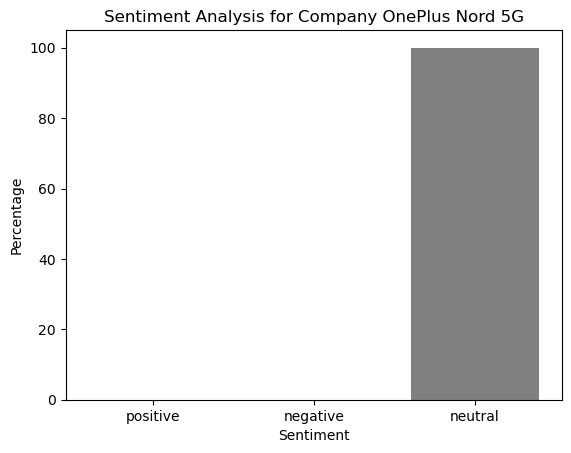

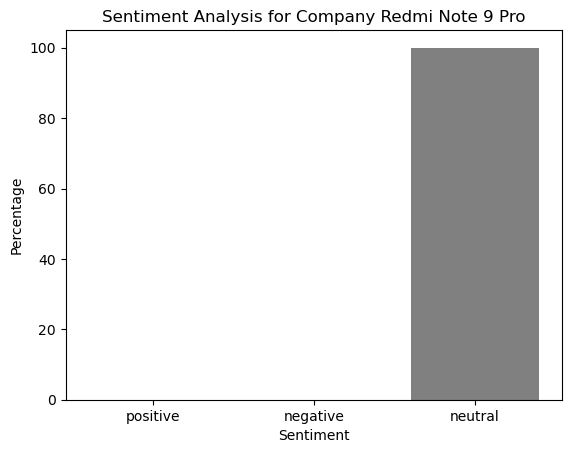

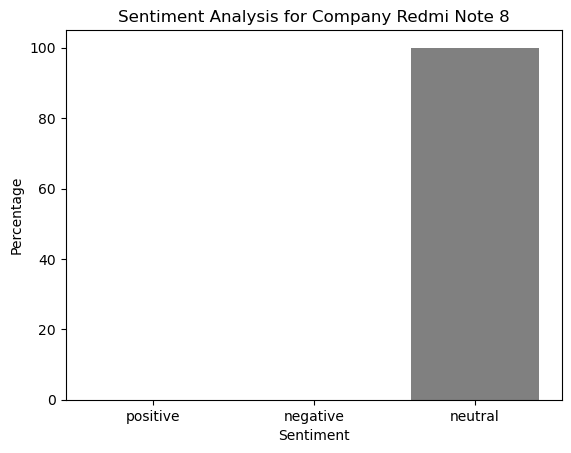

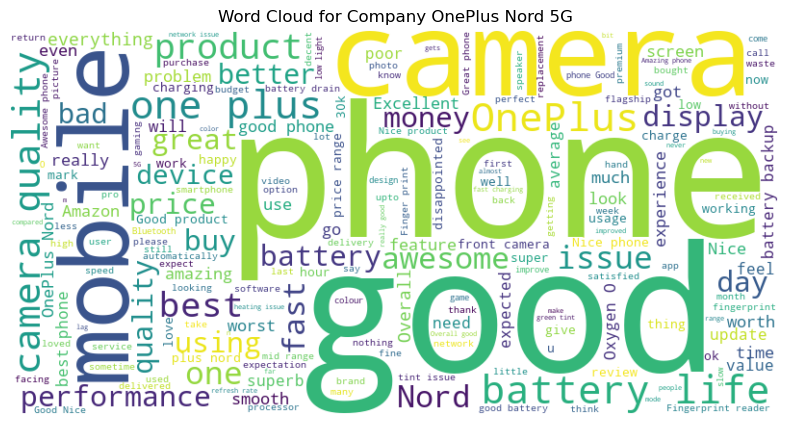

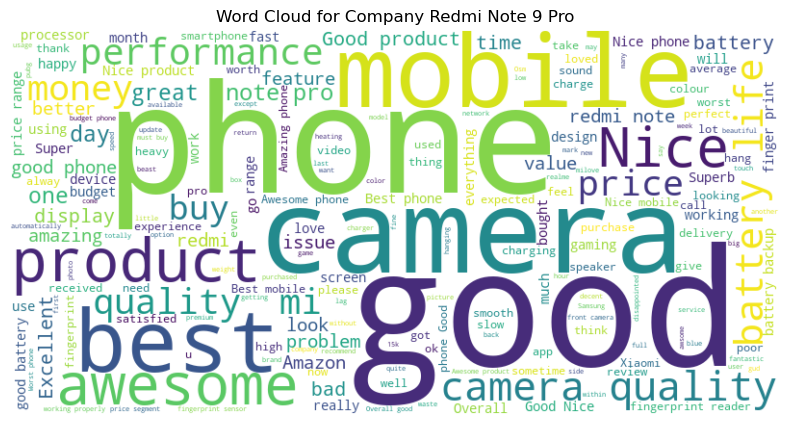

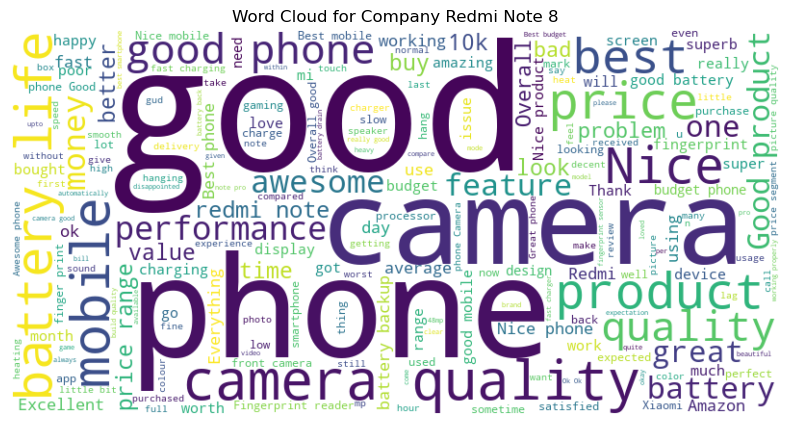

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
import pandas as pd
import json
from wordcloud import WordCloud  # Import WordCloud
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Convert DataFrame to list of dictionaries for each company
company_X_comments = [
    {"date": date, "text": text} for date, text in zip(company_X_comments['date'], company_X_comments['text'])
]
company_Y_comments = [
    {"date": date, "text": text} for date, text in zip(company_Y_comments['date'], company_Y_comments['text'])
]
company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.eval()

# Function to perform sentiment analysis using BERT
def analyze_sentiment_bert(comment):
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    if predictions == 0:
        return 'negative'
    elif predictions == 1:
        return 'neutral'
    elif predictions == 2:
        return 'positive'

# Function to calculate sentiment percentages using BERT
def calculate_sentiment_percentages_bert(comments):
    sentiments = [analyze_sentiment_bert(comment["text"]) for comment in comments]
    sentiment_counts = Counter(sentiments)
    total = len(sentiments)
    percentages = {sentiment: (count/total) * 100 for sentiment, count in sentiment_counts.items()}
    return percentages

# Function to plot sentiment analysis
def plot_sentiment_analysis(sentiment_percentages, company_name):
    categories = ['positive', 'negative', 'neutral']
    percentages = [sentiment_percentages.get(category, 0) for category in categories]

    fig, ax = plt.subplots()
    ax.bar(categories, percentages, color=['green', 'red', 'gray'])

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Analysis for {company_name}')
    plt.show()

# Function to generate word cloud
def generate_word_cloud(comments, company_name):
    # Concatenate all comments into a single string
    all_comments = " ".join(comment["text"] for comment in comments)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company_name}')
    plt.axis('off')
    plt.show()

# Calculate sentiment percentages for each company using BERT
sentiment_percentages_X = calculate_sentiment_percentages_bert(company_X_comments)
sentiment_percentages_Y = calculate_sentiment_percentages_bert(company_Y_comments)
sentiment_percentages_Z = calculate_sentiment_percentages_bert(company_Z_comments)

# Plot sentiment analysis for each company
plot_sentiment_analysis(sentiment_percentages_X, "Company OnePlus Nord 5G")
plot_sentiment_analysis(sentiment_percentages_Y, "Company Redmi Note 9 Pro")
plot_sentiment_analysis(sentiment_percentages_Z, "Company Redmi Note 8")

# Generate word clouds for each company
generate_word_cloud(company_X_comments, "Company OnePlus Nord 5G")
generate_word_cloud(company_Y_comments, "Company Redmi Note 9 Pro")
generate_word_cloud(company_Z_comments, "Company Redmi Note 8")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yosri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


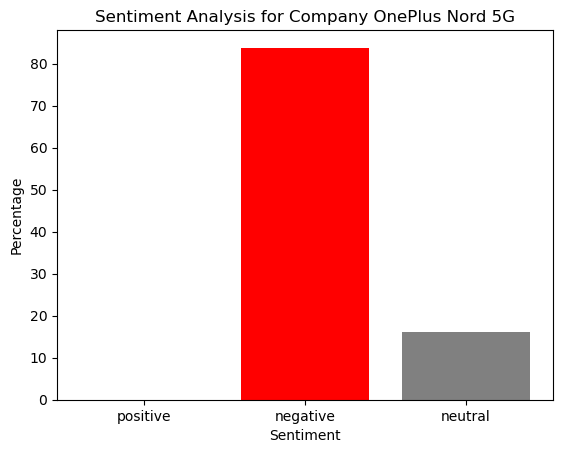

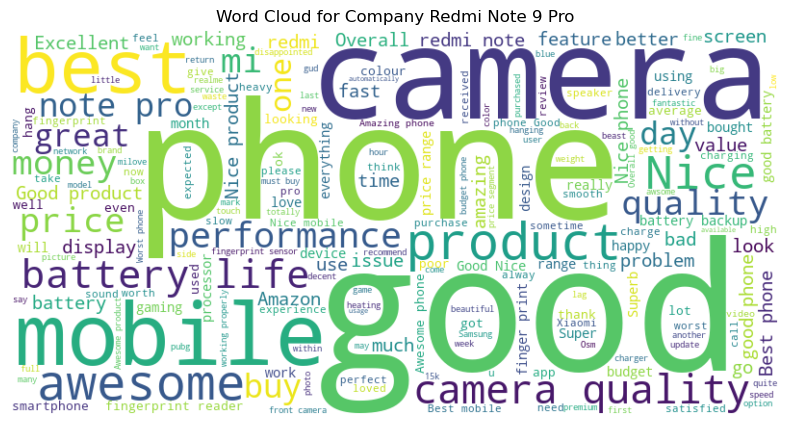

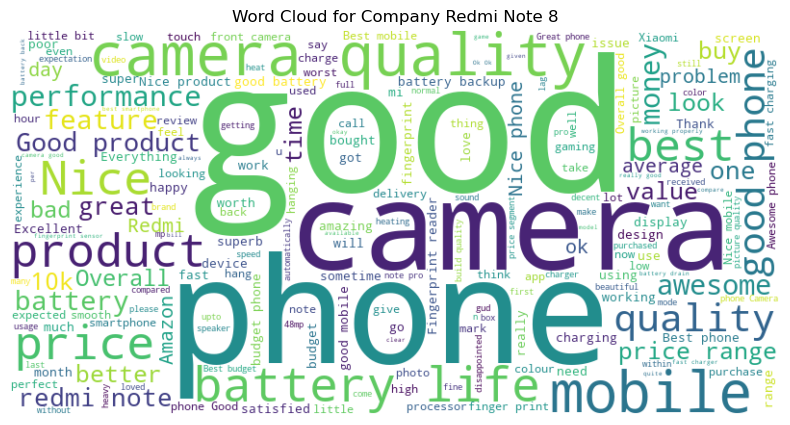

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
import pandas as pd
import json
from wordcloud import WordCloud
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

# Create DataFrames for each company
company_X_comments = product_dataframes.get('OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', pd.DataFrame())
company_Y_comments = product_dataframes.get('Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())
company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

# Convert DataFrame to list of dictionaries for each company
company_X_comments = [
    {"date": date, "text": text} for date, text in zip(company_X_comments['date'], company_X_comments['text'])
]
company_Y_comments = [
    {"date": date, "text": text} for date, text in zip(company_Y_comments['date'], company_Y_comments['text'])
]
company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.eval()

# Function to perform sentiment analysis using BERT
def analyze_sentiment_bert(comment):
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    if predictions == 0:
        return 'negative'
    elif predictions == 1:
        return 'neutral'
    elif predictions == 2:
        return 'positive'

# Function to calculate sentiment percentages using BERT
def calculate_sentiment_percentages_bert(comments):
    sentiments = [analyze_sentiment_bert(comment["text"]) for comment in comments]
    sentiment_counts = Counter(sentiments)
    total = len(sentiments)
    percentages = {sentiment: (count/total) * 100 for sentiment, count in sentiment_counts.items()}
    return percentages

# Function to plot sentiment analysis
def plot_sentiment_analysis(ax, sentiment_percentages, company_name):
    categories = ['positive', 'negative', 'neutral']
    percentages = [sentiment_percentages.get(category, 0) for category in categories]

    ax.bar(categories, percentages, color=['green', 'red', 'gray'])

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Sentiment Analysis for {company_name}')

# Function to generate word cloud
def generate_word_cloud(all_comments, company_name):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {company_name}')
    plt.axis('off')
    plt.show()

# Function to update plots based on selected company
def update_plots(event):
    selected_company = company_combobox.get()

    if selected_company == 'Company OnePlus Nord 5G':
        sentiment_percentages = calculate_sentiment_percentages_bert(company_X_comments)
        generate_word_cloud(" ".join(comment["text"] for comment in company_X_comments), selected_company)
    elif selected_company == 'Company Redmi Note 9 Pro':
        sentiment_percentages = calculate_sentiment_percentages_bert(company_Y_comments)
        generate_word_cloud(" ".join(comment["text"] for comment in company_Y_comments), selected_company)
    elif selected_company == 'Company Redmi Note 8':
        sentiment_percentages = calculate_sentiment_percentages_bert(company_Z_comments)
        generate_word_cloud(" ".join(comment["text"] for comment in company_Z_comments), selected_company)
    else:
        return

    ax.clear()
    plot_sentiment_analysis(ax, sentiment_percentages, selected_company)
    canvas.draw()

# Create main window
root = tk.Tk()
root.title("Sentiment Analysis Dashboard")

# Create a frame for company selection and plots
frame = ttk.Frame(root)
frame.pack(padx=10, pady=10)

# Create a label and combobox for selecting company
company_label = ttk.Label(frame, text="Select Company:")
company_label.grid(row=0, column=0, padx=5, pady=5)

companies = ['Company OnePlus Nord 5G', 'Company Redmi Note 9 Pro', 'Company Redmi Note 8']
company_combobox = ttk.Combobox(frame, values=companies)
company_combobox.grid(row=0, column=1, padx=5, pady=5)
company_combobox.bind("<<ComboboxSelected>>", update_plots)

# Create a figure and subplot for sentiment analysis
fig, ax = plt.subplots()
plot_sentiment_analysis(ax, calculate_sentiment_percentages_bert(company_X_comments), 'Company OnePlus Nord 5G')

# Create a canvas to display the plot
canvas = FigureCanvasTkAgg(fig, master=frame)
canvas.draw()
canvas.get_tk_widget().grid(row=1, column=0, columnspan=2, padx=5, pady=5)

# Run the application
root.mainloop()
 

BERT + TextBlob

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import nltk
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import pandas as pd
import networkx as nx
import json
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader

# Download NLTK resources
nltk.download('stopwords')

# Load JSON file
with open('amazon_one_plus_reviews.json', 'r') as file:
    data = json.load(file)

# Create DataFrames for each product
product_dataframes = {}

# Extract data for each product
for entry in data:
    product_name = entry['product'].split('-')[0].strip()  # Extract essential part of the product name
    if product_name not in product_dataframes:
        product_dataframes[product_name] = []
    
    review_date = entry['reviewed_at']
    review_text = entry['review_text']

    product_dataframes[product_name].append({
        'date': review_date,
        'text': review_text
    })

# Create DataFrames and store them with product names
for product, data in product_dataframes.items():
    df = pd.DataFrame(data)
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
    product_dataframes[product] = df

company_Z_comments = product_dataframes.get('Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)', pd.DataFrame())

company_Z_comments = [
    {"date": date, "text": text} for date, text in zip(company_Z_comments['date'], company_Z_comments['text'])
]

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(comment):
    analysis = TextBlob(comment)
    # Define threshold for classifying sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Function to fine-tune BERT model for sentiment analysis
def fine_tune_bert_model(comments, sentiments):
    # Load pre-trained BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    # Tokenize the text data
    input_ids = []
    attention_masks = []
    for comment in comments:
        encoded_dict = tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=64,  # Adjust max length as needed
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    # Convert string labels to numerical labels
    label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
    labels = torch.tensor([label_dict[sentiment] for sentiment in sentiments])

    # Split the data into training and testing sets
    train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
    train_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, test_size=0.2, random_state=42)

    # Create data loaders
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

    val_data = TensorDataset(val_inputs, val_masks, val_labels)
    val_dataloader = DataLoader(val_data, batch_size=32)

    # Set parameters for fine-tuning
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)  # Adjust learning rate as needed
    epochs = 12  # Adjust number of epochs as needed

    # Fine-tune BERT model
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

    return model, tokenizer

# Function to analyze sentiment using fine-tuned BERT model
def analyze_sentiment_bert(model, tokenizer, comment):
    inputs = tokenizer.encode_plus(
        comment,
        add_special_tokens=True,
        max_length=64,  # Adjust max length as needed
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    label_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return label_dict[predicted_class]

# GUI
class SentimentDashboard(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Sentiment Analysis Dashboard")

        # Dropdown to select year for bar graph
        self.year_var = tk.StringVar()
        self.year_dropdown = ttk.Combobox(self, textvariable=self.year_var,
                                          values=sorted(set(comment["date"][:4] for comment in company_Z_comments)))
        self.year_dropdown.pack()

        # Frame for displaying plots
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Button to display bar graph
        self.show_bar_graph_button = ttk.Button(self, text="Show Sentiment Bar Graph", command=self.show_bar_graph)
        self.show_bar_graph_button.pack()

        # Button to generate word cloud
        self.generate_word_cloud_button = ttk.Button(self, text="Generate Word Cloud", command=self.generate_word_cloud)
        self.generate_word_cloud_button.pack()  

        # Button to construct and display network graph
        self.network_graph_button = ttk.Button(self, text="Network Graph", command=self.construct_and_display_network_graph)
        self.network_graph_button.pack()

        # Button to train and evaluate the model
        self.train_model_button = ttk.Button(self, text="Train and Evaluate Model", command=self.train_and_evaluate_model)
        self.train_model_button.pack()

    def show_bar_graph(self):
        # Calculate sentiment percentages by year
        sentiment_percentages_by_year = {}
        for year in sorted(set(comment["date"][:4] for comment in company_Z_comments)):
            year_comments = [comment for comment in company_Z_comments if comment["date"].startswith(year)]
            sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in year_comments]
            sentiment_counts = Counter(sentiments)
            total_comments = len(sentiments)
            sentiment_percentages = {sentiment: (count / total_comments) * 100 for sentiment, count in sentiment_counts.items()}
            sentiment_percentages_by_year[year] = sentiment_percentages

        # Extract data for plotting
        years = sorted(sentiment_percentages_by_year.keys())
        positive_percentages = [sentiment_percentages_by_year[year].get('positive', 0) for year in years]
        negative_percentages = [sentiment_percentages_by_year[year].get('negative', 0) for year in years]
        neutral_percentages = [sentiment_percentages_by_year[year].get('neutral', 0) for year in years]

        # Plotting
        fig, ax = plt.subplots()
        bar_width = 0.2  # Width of the bars
        index = np.arange(len(years))

        ax.bar(index, positive_percentages, bar_width, label='Positive', color='green')
        ax.bar(index + bar_width, negative_percentages, bar_width, label='Negative', color='red')
        ax.bar(index + 2 * bar_width, neutral_percentages, bar_width, label='Neutral', color='gray')

        ax.set_xlabel('Year')
        ax.set_ylabel('Percentage')
        ax.set_title('Sentiment Analysis by Year')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(years)
        ax.legend()

        # Clear previous plot frame and create a new one for the bar graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the bar graph plot into the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def generate_word_cloud(self):
        # Extract all comments
        all_comments = [comment["text"] for comment in company_Z_comments]
        
        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_comments))
        
        # Clear previous plot frame and create a new one for the word cloud
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the word cloud plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def construct_and_display_network_graph(self):
        G = nx.Graph()
        for comment in company_Z_comments:
            G.add_node(comment["date"])

        # Clear previous plot frame and create a new one for network graph
        self.plot_frame.destroy()
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10)

        # Embedding the network graph plot into the Tkinter window
        plt.figure(figsize=(10, 5))
        nx.draw(G, with_labels=True)
        plt.title('Network Graph')
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def train_and_evaluate_model(self):
        # Extract features (text) and labels (sentiment)
        comments_text = [comment["text"] for comment in company_Z_comments]
        sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in company_Z_comments]

        # Train and evaluate BERT model
        bert_model, tokenizer = fine_tune_bert_model(comments_text, sentiments)

        # Test BERT model
        test_comments = ["This phone is amazing!", "The phone arrived broken.", "I have mixed feelings about this product."]
        correct_predictions = 0
        total_predictions = 0
        for comment, true_sentiment in zip(test_comments, ["positive", "negative", "neutral"]):
            sentiment = analyze_sentiment_bert(bert_model, tokenizer, comment)
            total_predictions += 1
            if sentiment == true_sentiment:
                correct_predictions += 1
        accuracy = correct_predictions / total_predictions
        print(f"Accuracy: {accuracy}")

        # Print individual predictions
        for comment in test_comments:
            sentiment = analyze_sentiment_bert(bert_model, tokenizer, comment)
            print(f"BERT Prediction for '{comment}': {sentiment}")


# Run the application
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    app = SentimentDashboard()
    app.mainloop()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vk768\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\vk768\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in 

Epoch 1/12, Loss: 116.41582404077053
Epoch 2/12, Loss: 56.68519694916904
Epoch 3/12, Loss: 37.047433531843126


: 

In [ ]:
def train_and_evaluate_model(self):
    # Extract features (text) and labels (sentiment)
    comments_text = [comment["text"] for comment in company_Z_comments]
    sentiments = [analyze_sentiment_textblob(comment["text"]) for comment in company_Z_comments]

    # Train and evaluate BERT model
    bert_model, tokenizer = fine_tune_bert_model(comments_text, sentiments)

    # Test BERT model
    test_comments = ["This phone is amazing!", "The phone arrived broken.", "I have mixed feelings about this product."]
    correct_predictions = 0
    total_predictions = 0
    for comment, true_sentiment in zip(test_comments, ["positive", "negative", "neutral"]):
        sentiment = analyze_sentiment_bert(bert_model, tokenizer, comment)
        total_predictions += 1
        if sentiment == true_sentiment:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    print(f"Accuracy: {accuracy}")

    # Print individual predictions
    for comment in test_comments:
        sentiment = analyze_sentiment_bert(bert_model, tokenizer, comment)
        print(f"BERT Prediction for '{comment}': {sentiment}")
